In [1]:
!export PATH="/home/fzaidoun/anaconda3/envs/him/bin:$PATH"

In [2]:
!conda install -c conda-forge dynesty -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/fzaidoun/anaconda3/envs/him

  added / updated specs:
    - dynesty


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    dynesty-1.1                |     pyh44b312d_0          70 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          70 KB

The following NEW packages will be INSTALLED:

  dynesty            conda-forge/noarch::dynesty-1.1-pyh44b312d_0



dynesty-1.1          | 70 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [1]:
import numpy as np
from astropy.io import ascii
from functions import *

In [2]:
print("loading data")
cols = ['SFR',
        'flag_vsquared',
        'flag_voidfinder']
data = ascii.read('../data_flags_updated_Nov1.dat', include_names=cols)
SFR = data['SFR']

print("loading classification")
#classification V^2
wall_v2 = np.argwhere(data['flag_vsquared'] == 0).flatten()
void_v2 = np.argwhere(data['flag_vsquared'] == 1).flatten()
edge_v2 = np.argwhere(data['flag_vsquared'] == 2).flatten()
out_v2 = np.argwhere(data['flag_vsquared'] == 9).flatten()

#classification voidfinder
wall_vf = np.argwhere(data['flag_voidfinder'] == 0).flatten()
void_vf = np.argwhere(data['flag_voidfinder'] == 1).flatten()
edge_vf = np.argwhere(data['flag_voidfinder'] == 2).flatten()
out_vf = np.argwhere(data['flag_voidfinder'] == 9).flatten()

## property variables
print("loading property model variables")

# data and range
data1_wall_vf = remove_nan(SFR[wall_vf])
data2_void_vf = remove_nan(SFR[void_vf])
data1_wall_v2 = remove_nan(SFR[wall_v2])
data2_void_v2 = remove_nan(SFR[void_v2])
bins_ = np.linspace(-3,2, 250)#np.linspace(0,4, 170)
label_vf = 'SFR_VF'
label_v2 = 'SFR_V2'

loading data
loading classification
loading property model variables


In [3]:
bounds1 = [[0, 3],     # s ........ scale factor (peak 1 to 2) #2.5

           [100., 1000.],  # a ........ skew normal 1 amplitude # 2000 and 100
           [-2., -0.6],     # mu_a ..... skew normal 1 location  # 0.5
           [0.05,1],     # sigma_a .. skew normal 1 scale #0.2
           [-10., 10.],    # a_skew ... skew normal 1 skew

           [100, 4000.],  # b ........ skew normal 2 amplitude #6100 and 150
           [0, 1.],     # mu_b ..... skew normal 2 location #0.9  # should not overlap with mu_a
           [0.1, 2],     # sigma_b .. skew normal 2 scale #0.1
           [-10., 10.]]    # b_skew ... skew normal 2 skew


# [ 5.10627839e-01,  7.83682695e+02, -8.86655486e-01,  3.44599372e-01,
# -1.49398220e+00,  2.76013422e+03,  4.49217048e-01,  8.99151610e-01,
# -2.46410872e+00]

In [4]:
def prior_xform1(u):
    """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

    Parameters
    ----------
    u : ndarray
        Array of uniform random numbers between 0 and 1.

    Returns
    -------
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    """
    s       = uniform(0.1, 10., u[0])
    a       = jeffreys(1., 1e4, u[1])
    mu_a    = uniform(-2., -0.6, u[2])
    sigma_a = jeffreys(0.1, 2., u[3])
    xi_a    = uniform(-10., 10., u[4])
    b       = jeffreys(1., 1e4, u[5])
    mu_b    = uniform(0, 1., u[6])
    sigma_b = jeffreys(0.05, 2., u[7])
    xi_b    = uniform(-10., 10., u[8])

    return s, a, mu_a, sigma_a, xi_a, b, mu_b, sigma_b, xi_b

In [8]:
bounds1_ = [[100., 5000.],  # change after running model 1
        [-2, 0],     # mu_a ..... skew normal 1 location #0.5
        [0.05, 1.0],     # sigma_a .. skew normal 1 scale #0.7
        [-10, 10],    # a_skew ... skew normal 1 skew
        [100., 5000.],  # b ........ skew normal 2 amplitude #6100
        [0, 1],     # mu_b ..... skew normal 2 location #0.9
        [0.04, 1.0],     # sigma_b .. skew normal 2 scale #0.4
        [-10., 10]]    # a_skew ... skew normal 2 skew

bounds2_ = [[100., 1000.],    # change after running model 1
            [-2, -0.5],     # mu_g ..... skew normal 3 location #0.5
            [0.1, 2.0],     # sigma_g .. skew normal 3 scale #0.6
            [-10, 10.],    # g_skew ... skew normal 3 skew
            [100., 1500.],   # d ........ skew normal 4 amplitude #800
            [-0.2, 1],     # mu_d ..... skew normal 4 location #0.8
            [0.1, 2.0],     # sigma_d .. skew normal 4 scale #0.3
            [-10., 10]]    # d_skew ... skew normal 4 skew
bounds2 = bounds1_ + bounds2_


[ 1.48189873e+03
 -8.12187228e-01 
 4.60958012e-01
 -1.72458832e+00
  2.05816365e+03 
 1.59083741e-01 
 4.46621675e-01
 
 -5.09987821e-01
  2.39195098e+02 
 -9.61144705e-01 
 2.93728726e-01
 -1.23562021e+00
  1.56894452e+03 
 4.58326388e-01 
 9.39746014e-01
 -2.70324004e+00]


VoidFinder (VF)
plotting histograms of data...


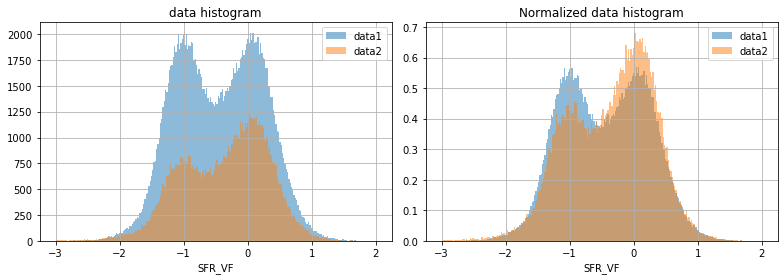

Running Model 1 using VF...


In [9]:
# [ 1.48189873e+03 -8.12187228e-01  4.60958012e-01 -1.72458832e+00
#   2.05816365e+03  1.59083741e-01  4.46621675e-01 -5.09987821e-01
 
#   2.39195098e+02 -9.61144705e-01  2.93728726e-01 -1.23562021e+00
#   1.56894452e+03  4.58326388e-01  9.39746014e-01 -2.70324004e+00]

# [ 1.48189873e+03 -8.12187228e-01  4.60958012e-01 -1.72458832e+00
#   2.05816365e+03  1.59083741e-01  4.46621675e-01 -5.09987821e-01
#   2.39195098e+02 -9.61144705e-01  2.93728726e-01 -1.23562021e+00
#   1.56894452e+03  4.58326388e-01  9.39746014e-01 -2.70324004e+00]

# [ 5.11188303e-01  7.83128583e+02 -8.89373351e-01  3.46162418e-01
#  -1.46620106e+00  2.75766899e+03  4.49325011e-01  8.99613840e-01
#  -2.46648419e+00]

# bounds1 = [[0, 3],     # s ........ scale factor (peak 1 to 2) #2.5

#            [100., 1000.],  # a ........ skew normal 1 amplitude # 2000 and 100
#            [-2., -0.6],     # mu_a ..... skew normal 1 location  # 0.5
#            [0.05,1],     # sigma_a .. skew normal 1 scale #0.2
#            [-10., 10.],    # a_skew ... skew normal 1 skew

#            [100, 4000.],  # b ........ skew normal 2 amplitude #6100 and 150
#            [0, 1.],     # mu_b ..... skew normal 2 location #0.9  # should not overlap with mu_a
#            [0.1, 2],     # sigma_b .. skew normal 2 scale #0.1
#            [-10., 10.]]    # b_skew ... skew normal 2 skew

def prior_xform2(u):
    """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

    Parameters
    ----------
    u : ndarray
        Array of uniform random numbers between 0 and 1.

    Returns
    -------
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    """
    a       = jeffreys(1., 1e4, u[0])
    mu_a    = uniform(-2, -0.5, u[1])
    sigma_a = jeffreys(0.05, 2., u[2])
    xi_a    = uniform(-10., 10., u[3])
    b       = jeffreys(1., 1e4, u[4])
    mu_b    = uniform(-0.2, 1., u[5])
    sigma_b = jeffreys(0.05, 1., u[6])
    xi_b    = uniform(-10., 10., u[7])

    g       = jeffreys(1., 1e4, u[8])
    mu_g    = uniform(-2, -0.5, u[9])
    sigma_g = jeffreys(0.05, 2., u[10])
    xi_g    = uniform(-10., 10., u[11])
    d       = jeffreys(1., 1e4, u[12])
    mu_d    = uniform(-0.2, 1., u[13])
    sigma_d = jeffreys(0.05, 2., u[14])
    xi_d    = uniform(-10., 10., u[15])

    return a, mu_a, sigma_a, xi_a, \
           b, mu_b, sigma_b, xi_b, \
           g, mu_g, sigma_g, xi_g, \
           d, mu_d, sigma_d, xi_d


#for VF
print("VoidFinder (VF)")
plot_hist(data1_wall_vf,data2_void_vf,bins_,label_vf)
#model 1
print("Running Model 1 using VF...")

running the nested sampler... this might take from minutes to hours...


iter: 41645 | batch: 7 | bound: 2348 | nc: 5 | ncall: 1893553 | eff(%):  2.199 | loglstar: -3679.230 < -3670.618 < -3673.394 | logz: -3722.542 +/-  0.432 | stop:  0.886                              

sampler output saved as pickle file 'sampler_results_model1_SFR_VF'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 5.11188303e-01  7.83128583e+02 -8.89373351e-01  3.46162418e-01
 -1.46620106e+00  2.75766899e+03  4.49325011e-01  8.99613840e-01
 -2.46648419e+00]
Best fit results: 
Bayesian Evidence for model 1 :  -3722.544363704846


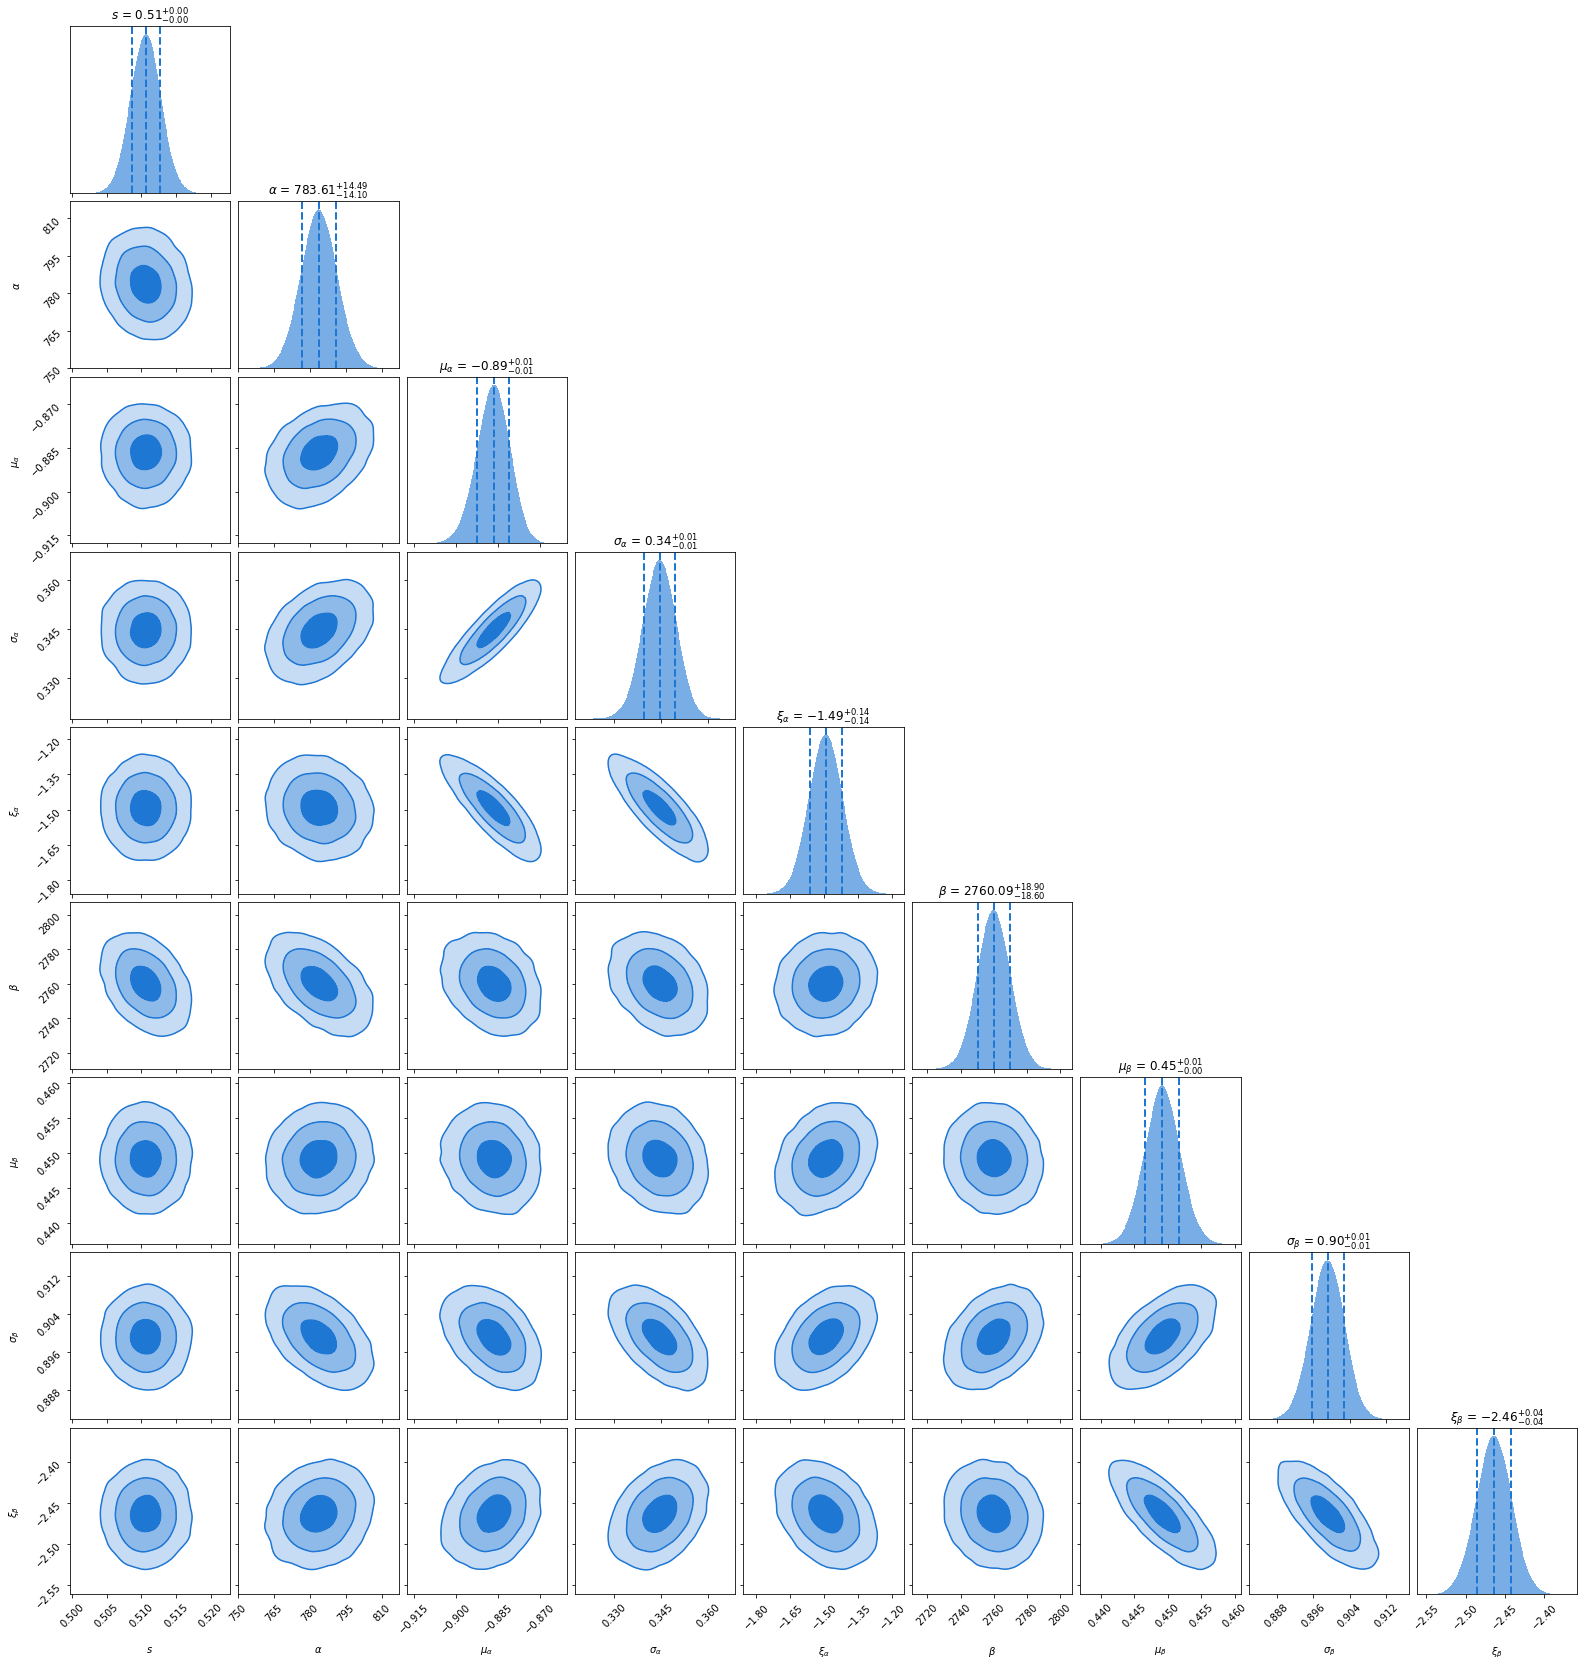

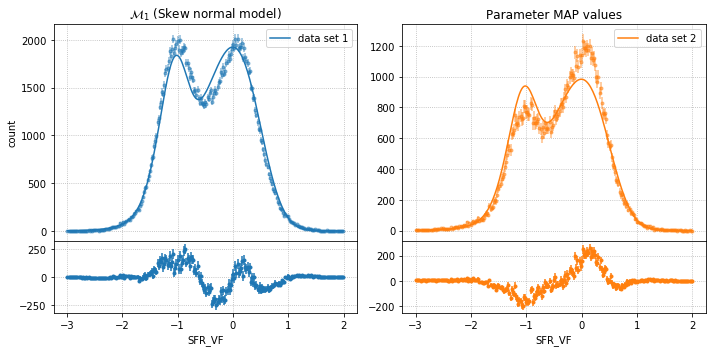

In [11]:
# Model_1_fit(bounds1,data1_wall_vf,data2_void_vf,bins_,label_vf)
Model_1_sampler(prior_xform1,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ1_vf = Model1_output(data1_wall_vf,data2_void_vf,bins_,label_vf)

Running Model 2 using VF...
running minimizer...this might take a few minutes...
plotting best fit results...
running the nested sampler... this might take from minutes to hours...


iter: 11556 | batch: 0 | bound: 146 | nc: 25 | ncall: 267403 | eff(%):  4.314 | loglstar:   -inf < -9825.973 <    inf | logz: -9855.960 +/-  0.346 | dlogz: 3509.977 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 15219 | batch: 0 | bound: 203 | nc: 29 | ncall: 370560 | eff(%):  4.101 | loglstar:   -inf < -5880.838 <    inf | logz: -5917.754 +/-  0.378 | dlogz: 1742.777 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 16935 | batch: 0 | bound: 227 | nc: 649 | ncall: 418161 | eff(%):  4.045 | loglstar:   -inf < 

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 19938 | batch: 0 | bound: 283 | nc: 25 | ncall: 576777 | eff(%):  3.454 | loglstar:   -inf < -3646.710 <    inf | logz: -3690.980 +/-  0.418 | dlogz: 714.188 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 20382 | batch: 0 | bound: 290 | 

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 44960 | batch: 0 | bound: 647 | nc: 25 | ncall: 1763552 | eff(%):  2.549 | loglstar:   -inf < -2657.535 <    inf | logz: -2741.835 +/-  0.555 | dlogz:  0.022 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 54573 | batch: 4 | bound: 753 | 

sampler output saved as pickle file 'sampler_results_model2_SFR_VF'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 1.48189873e+03 -8.12187228e-01  4.60958012e-01 -1.72458832e+00
  2.05816365e+03  1.59083741e-01  4.46621675e-01 -5.09987821e-01
  2.39195098e+02 -9.61144705e-01  2.93728726e-01 -1.23562021e+00
  1.56894452e+03  4.58326388e-01  9.39746014e-01 -2.70324004e+00]
Best fit results: 
Bayesian Evidence for model 2 :  -2741.8222805320156


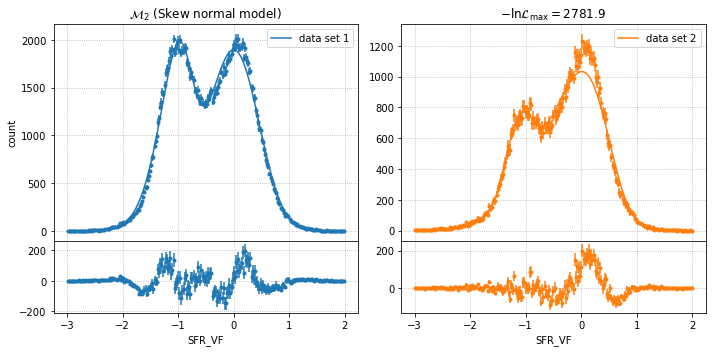

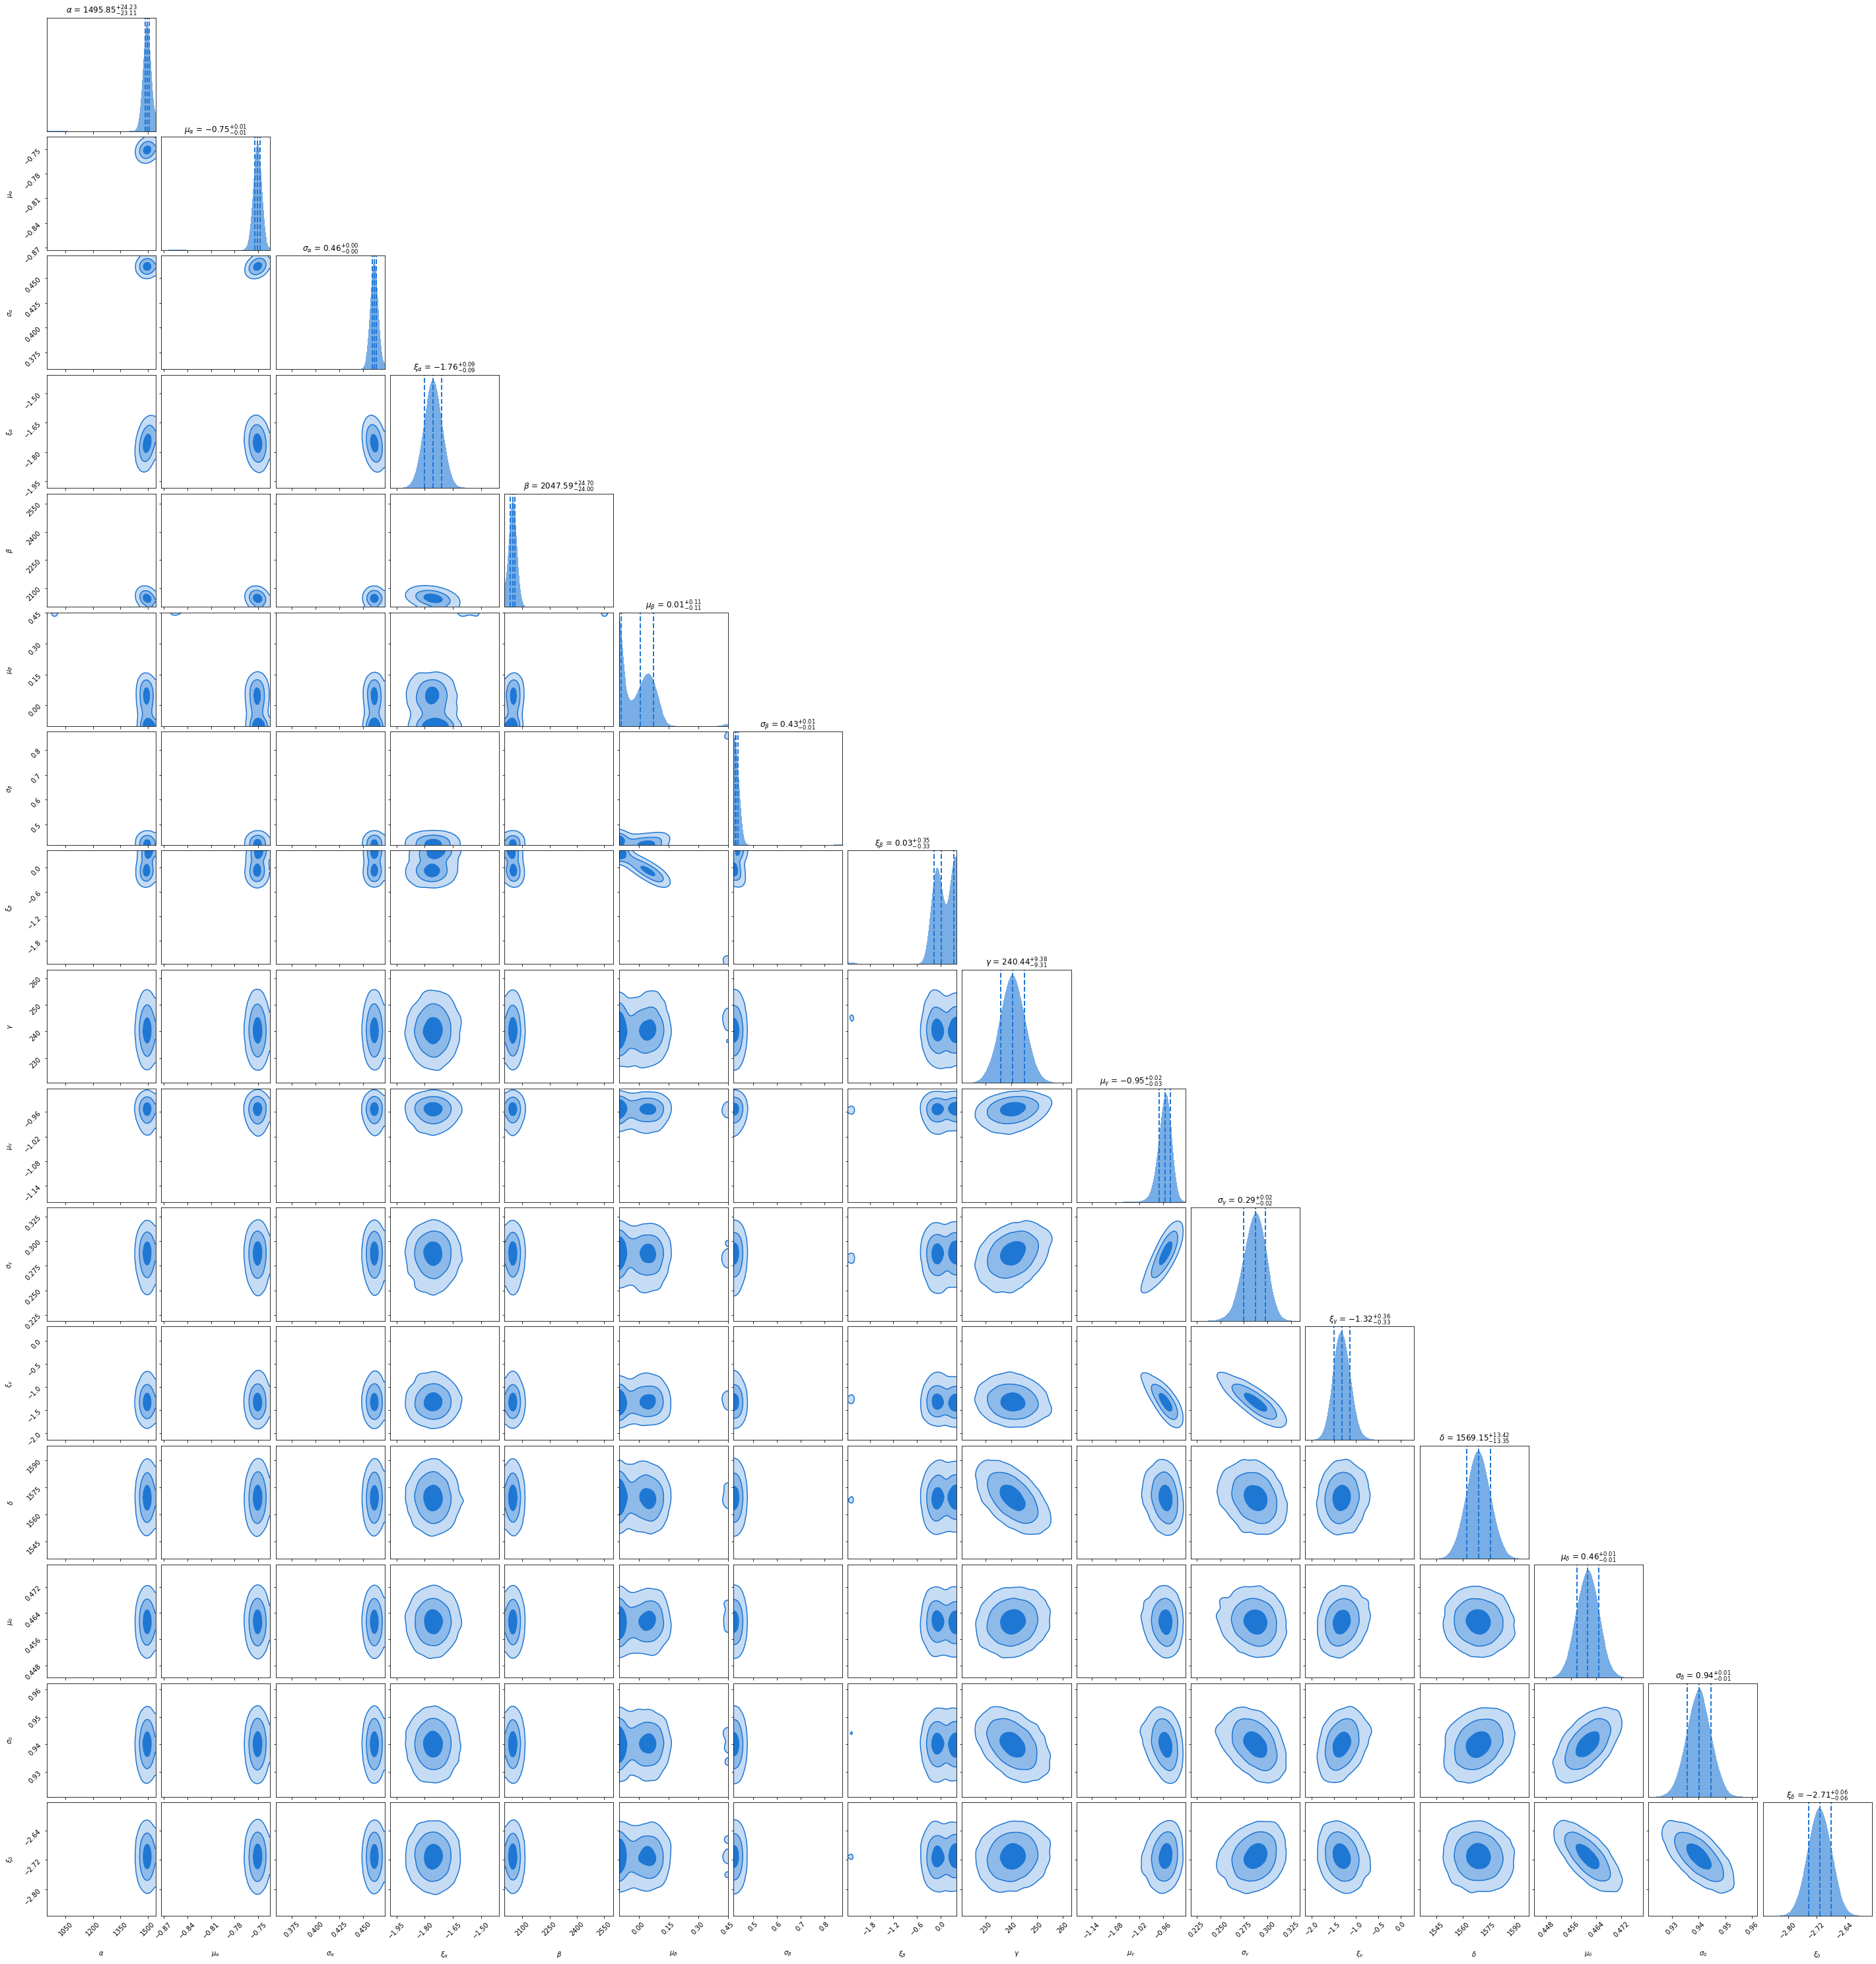

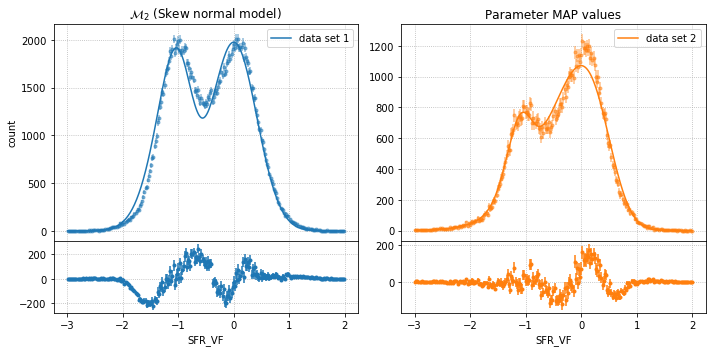

In [7]:
#model2
print("Running Model 2 using VF...")

Model_2_fit(bounds2,data1_wall_vf,data2_void_vf,bins_,label_vf)
# Model_2_sampler(prior_xform2,data1_wall_vf,data2_void_vf,bins_,label_vf)
# lnZ2_vf = Model2_output(data1_wall_vf,data2_void_vf,bins_,label_vf)




iter: 5 | batch: 0 | bound: 0 | nc: 1 | ncall: 5 | eff(%):  0.990 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.166 | dlogz:    inf >  0.010                                             

running the nested sampler... this might take from minutes to hours...


iter: 13809 | batch: 0 | bound: 177 | nc: 354 | ncall: 323682 | eff(%):  4.260 | loglstar:   -inf < -7330.725 <    inf | logz: -7364.089 +/-  0.364 | dlogz: 2348.485 >  0.010                        /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 16573 | batch: 0 | bound: 216 | nc: 28 | ncall: 402966 | eff(%):  4.108 | loglstar:   -inf < -5245.731 <    inf | logz: -5284.503 +/-  0.391 | dlogz: 1394.808 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserW

sampler output saved as pickle file 'sampler_results_model2_SFR_VF'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 9.96957260e+02 -8.55034430e-01  3.82693129e-01 -1.56124172e+00
  2.54390139e+03  4.37997048e-01  8.49108614e-01 -2.24509340e+00
  2.38483569e+02 -9.64950648e-01  2.88983956e-01 -1.16835061e+00
  1.56962337e+03  4.61712260e-01  9.42200286e-01 -2.71983324e+00]
Best fit results: 
Bayesian Evidence for model 2 :  -2748.136271232902


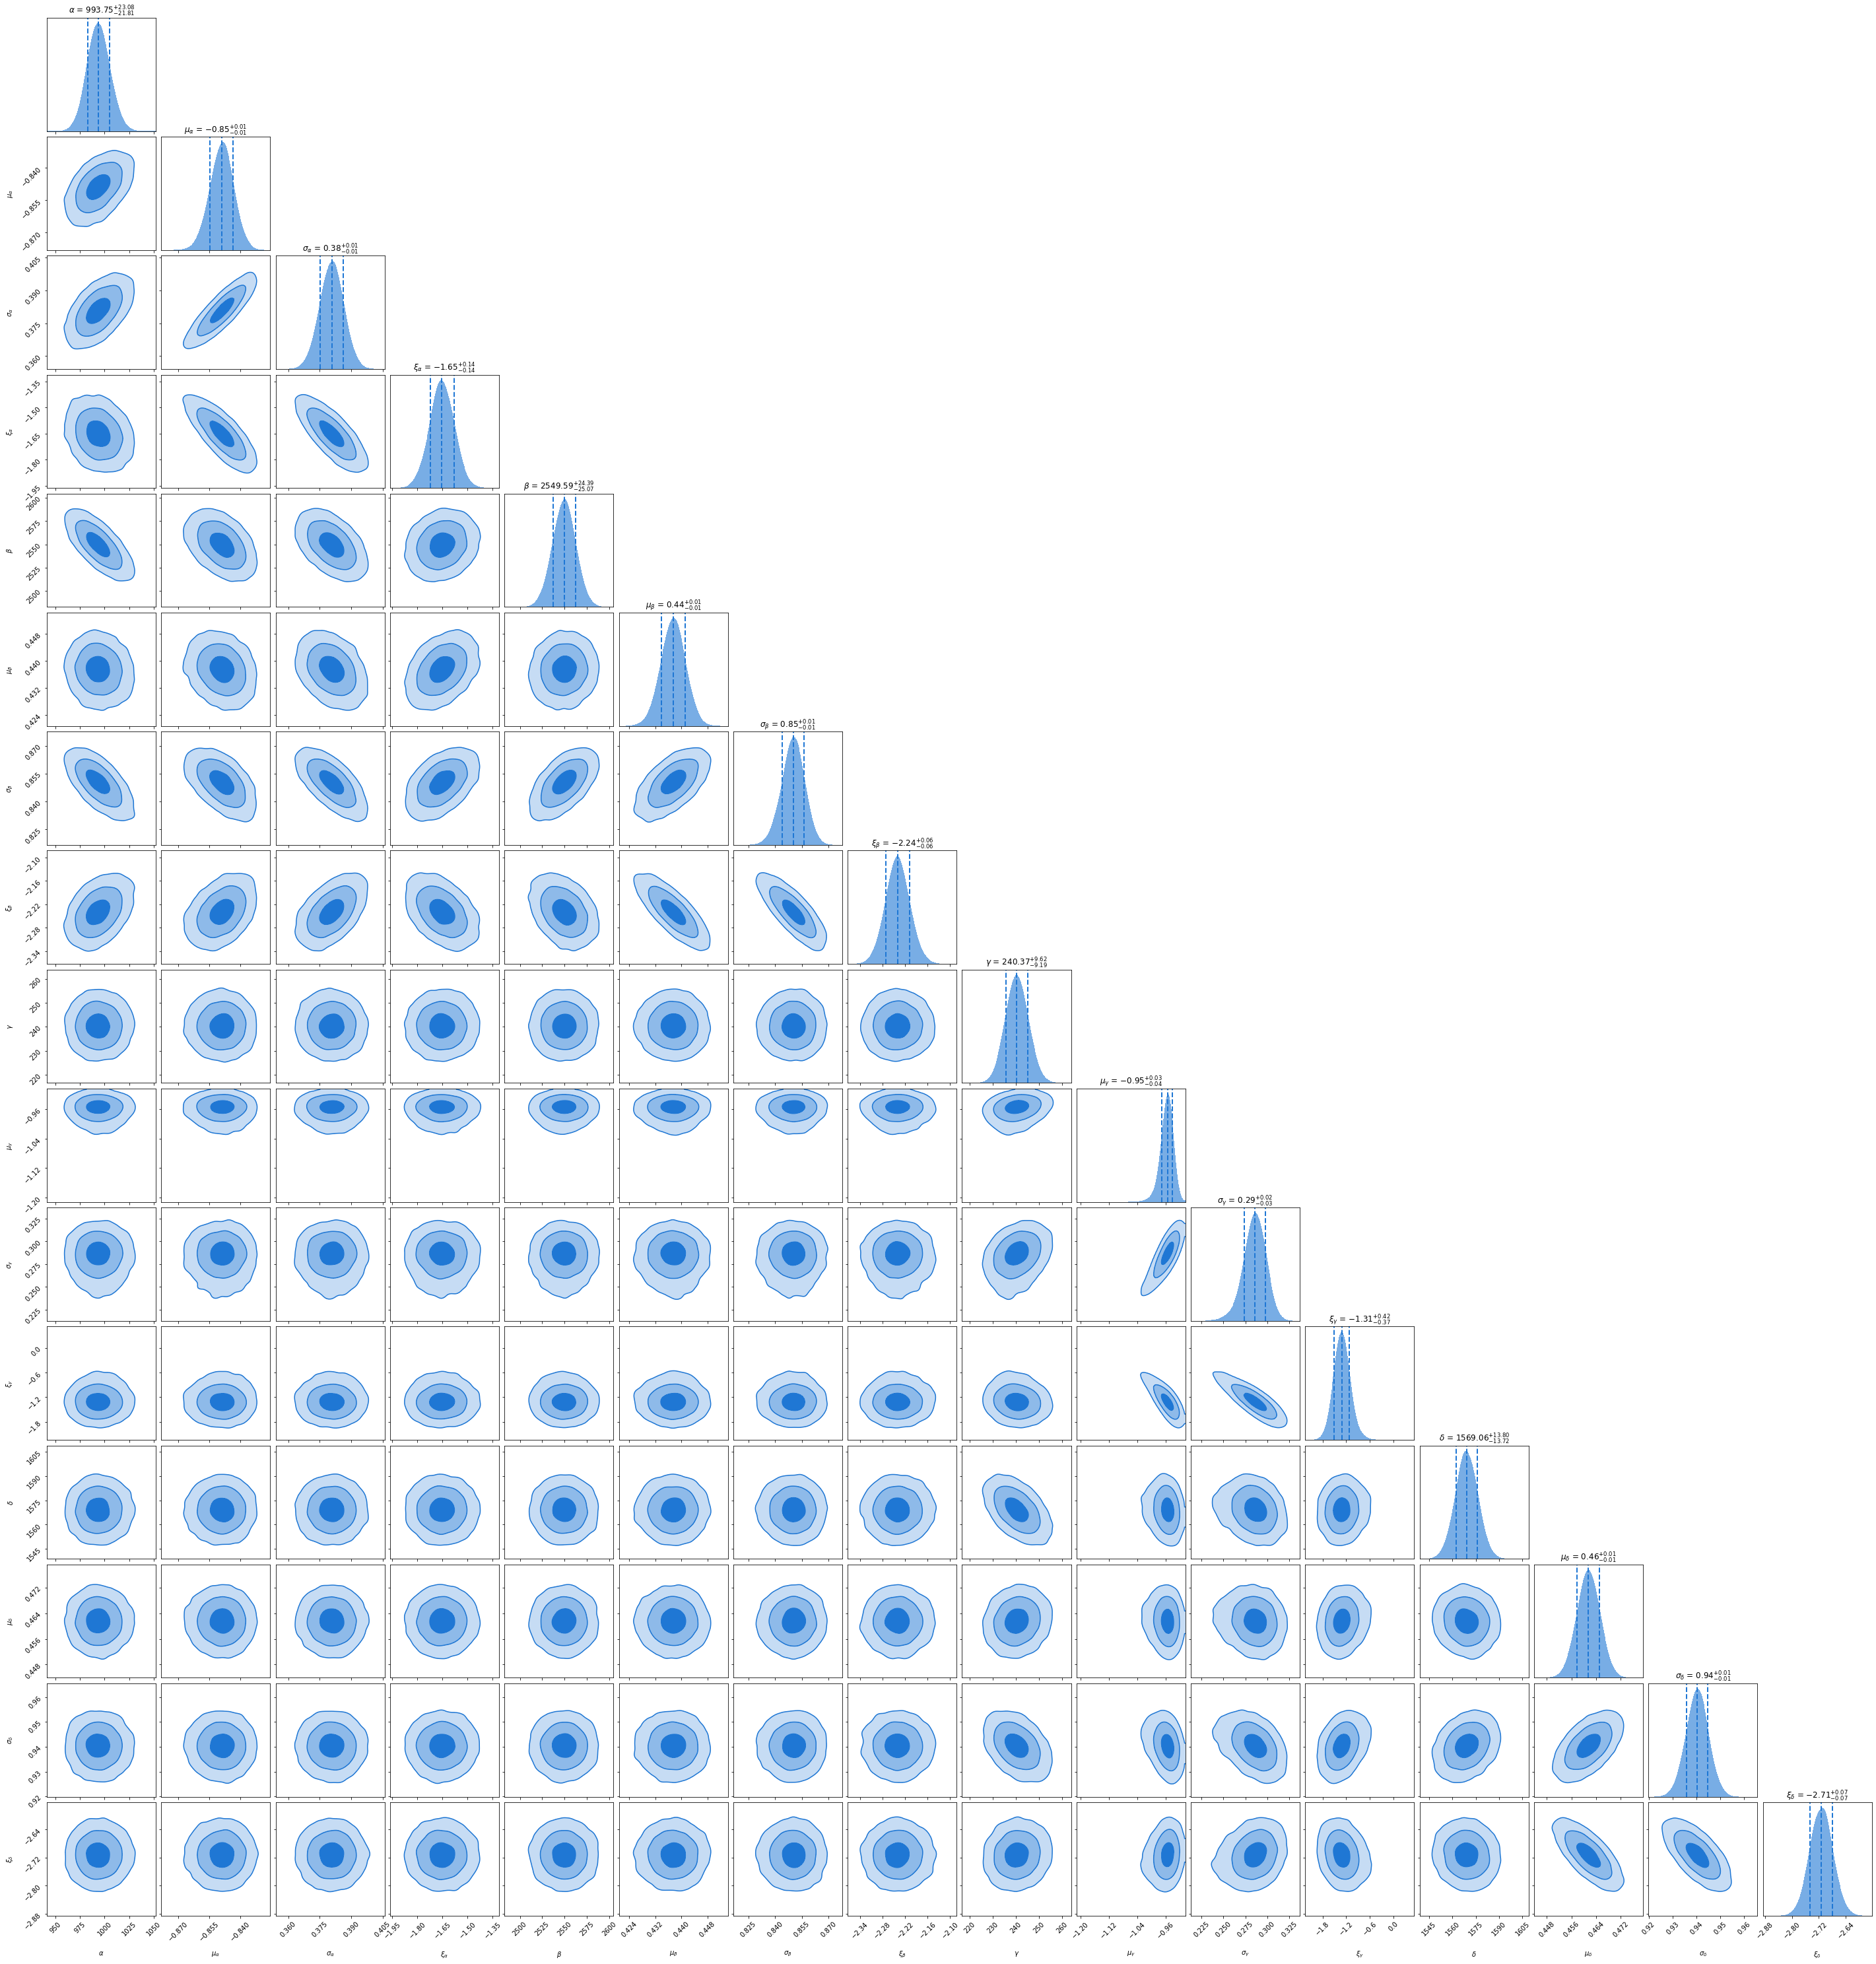

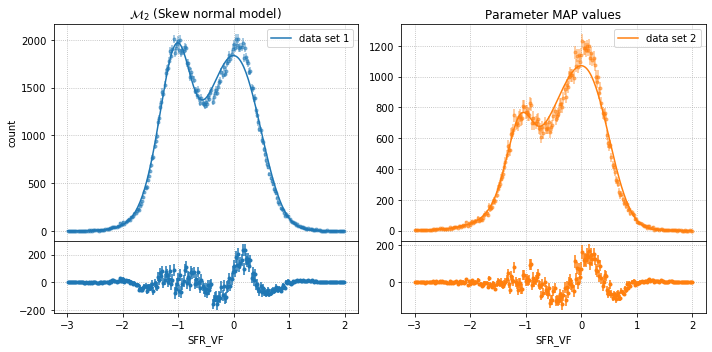

In [7]:
Model_2_sampler(prior_xform2,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ2_vf = Model2_output(data1_wall_vf,data2_void_vf,bins_,label_vf)

In [8]:
#Baye's Factor
lnB12_vf = lnZ1_vf - lnZ2_vf
logB12_vf = np.log10(np.e) * lnB12_vf
print("Log10 of Baye's Factor for g-r using VF is: ", logB12_vf)


NameError: name 'lnZ1_vf' is not defined

V2
plotting histograms of data...


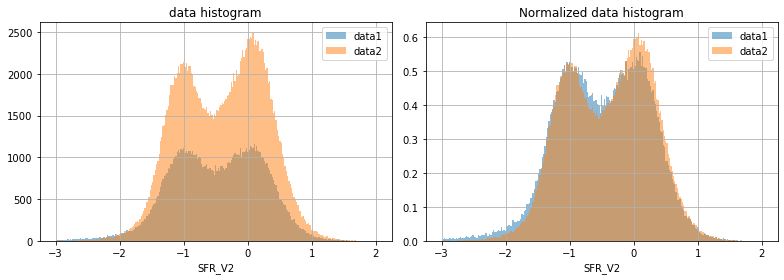

Running Model 1 using V2...
running minimizer...this might take a few minutes...


/gpfs/fs1/home/fzaidoun/Desktop/copy/desi_void_comparison/mixture-models/functions.py:135: RuntimeWarning: divide by zero encountered in log
  return np.sum(m*np.log(lambda1) - lambda1 - gammaln(m+1) + n*np.log(lambda2) - lambda2 - gammaln(n+1))
/gpfs/fs1/home/fzaidoun/Desktop/copy/desi_void_comparison/mixture-models/functions.py:135: RuntimeWarning: invalid value encountered in multiply
  return np.sum(m*np.log(lambda1) - lambda1 - gammaln(m+1) + n*np.log(lambda2) - lambda2 - gammaln(n+1))


best fit parameters       fun: 3651.9589110746783
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.48338587e-01, -1.81898796e-04,  2.42562236e-01, -6.10043572e-01,
       -7.13953345e-03, -9.09504320e-05, -8.03083822e-02, -4.00223142e-01,
        4.01087166e-02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 2330
      nit: 172
     njev: 233
   status: 0
  success: True
        x: array([ 1.93499854e+00,  4.34345394e+02, -9.10964724e-01,  3.11775918e-01,
       -1.18059025e+00,  1.66740743e+03,  4.62309393e-01,  9.59274020e-01,
       -2.66757216e+00])
running the nested sampler... this might take from minutes to hours...


iter: 42936 | batch: 7 | bound: 2808 | nc: 8 | ncall: 2220786 | eff(%):  1.933 | loglstar: -3661.823 < -3652.450 < -3655.002 | logz: -3703.916 +/-  0.427 | stop:  0.923                              

sampler output saved as pickle file 'sampler_results_model1_SFR_V2'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 1.93655264e+00  4.34007672e+02 -9.14975506e-01  3.12921815e-01
 -1.14544659e+00  1.66623366e+03  4.62451848e-01  9.59692184e-01
 -2.66993737e+00]
Best fit results: 
Bayesian Evidence for model 1 :  -3703.9212921082476
Running Model 2 using V2...


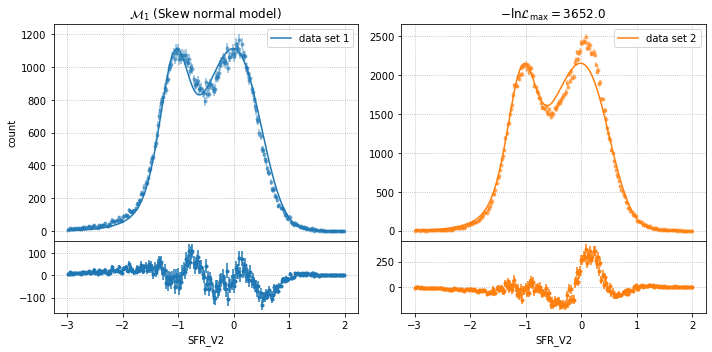

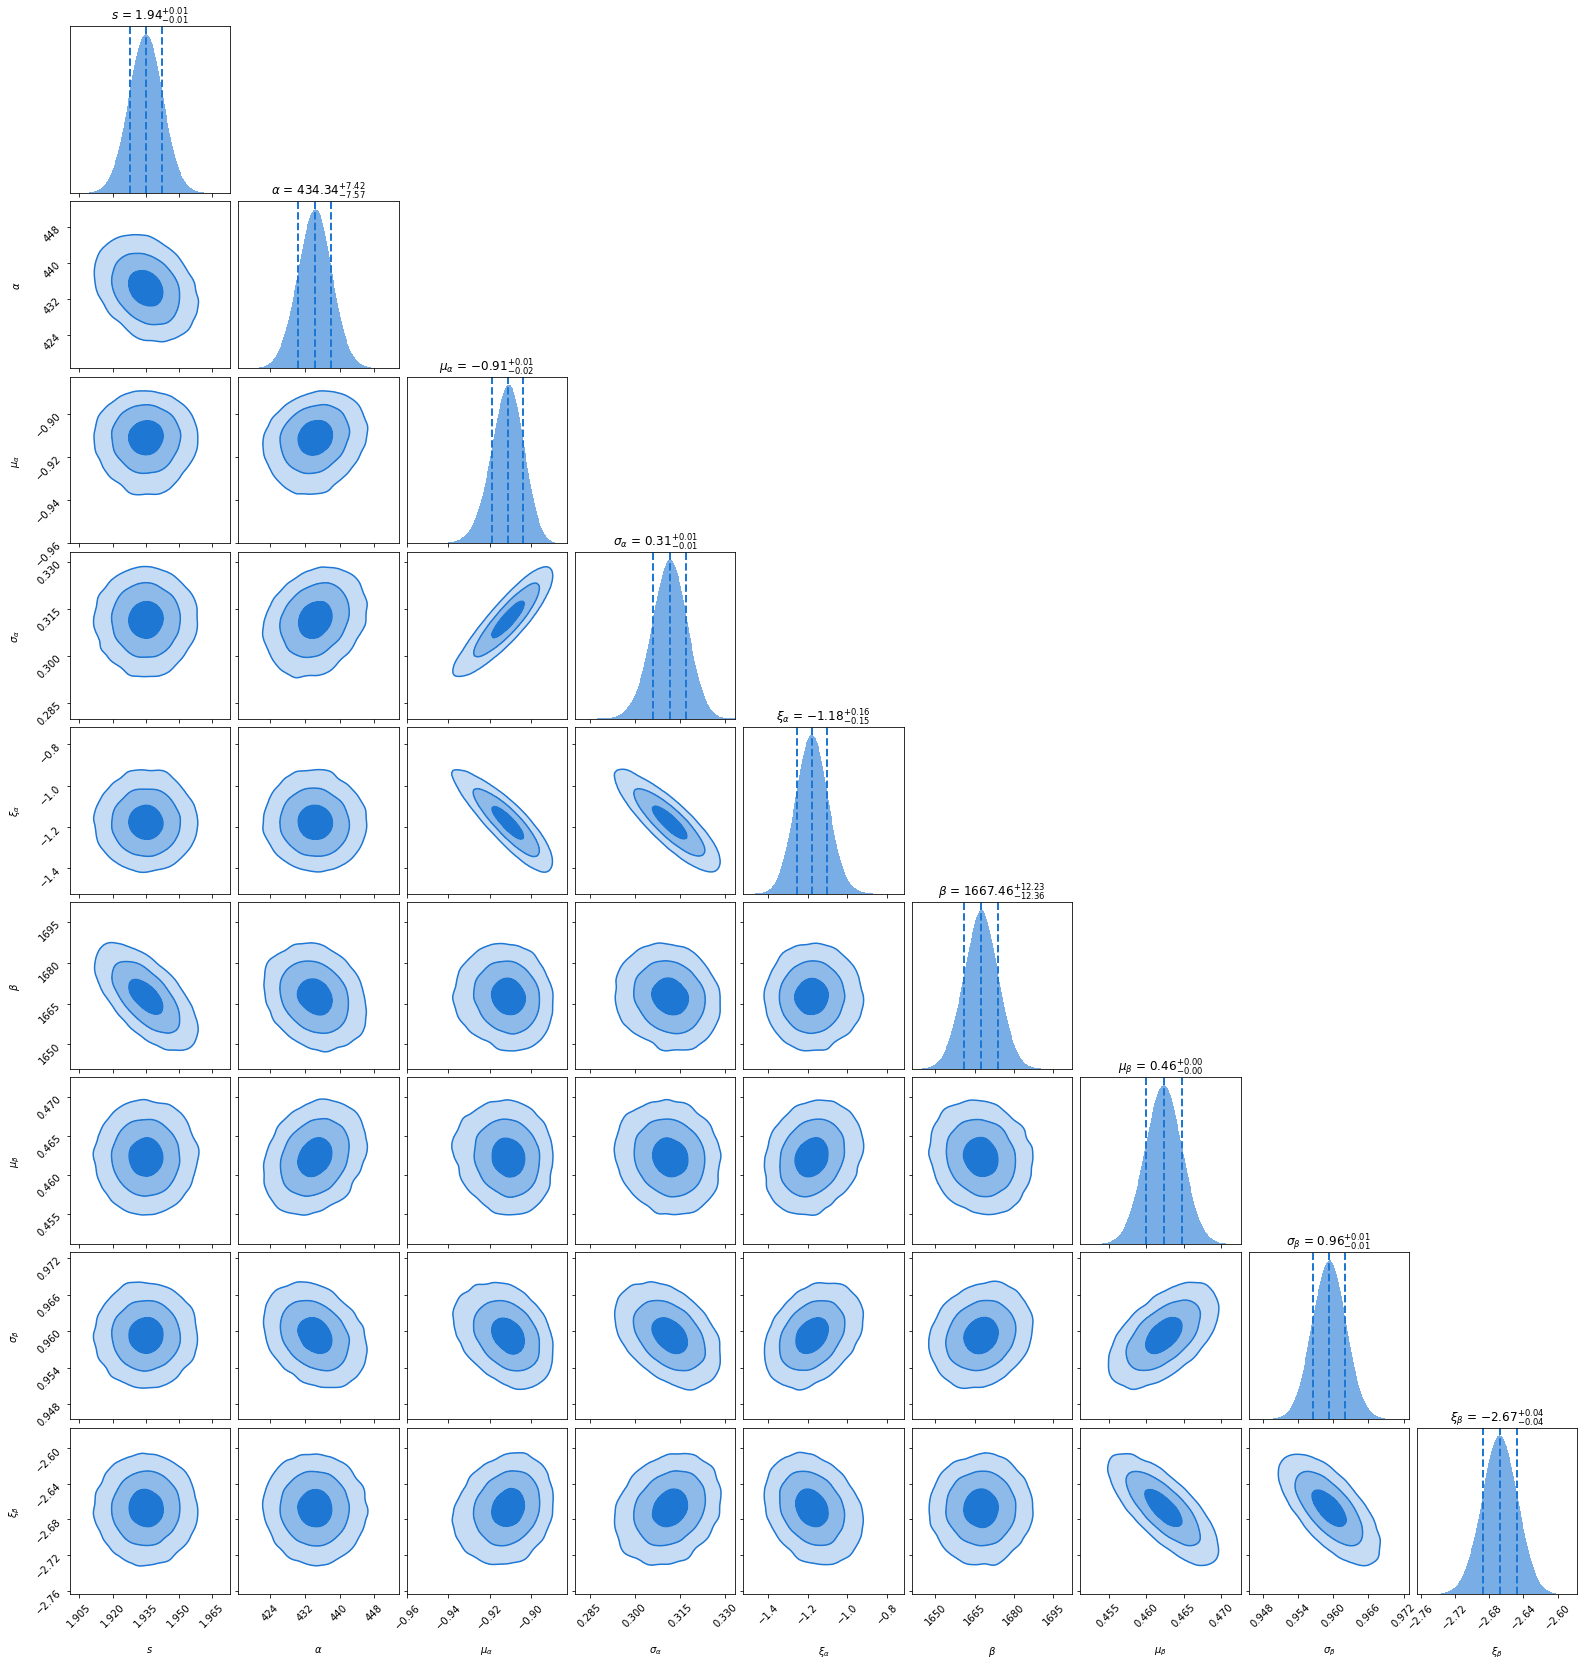

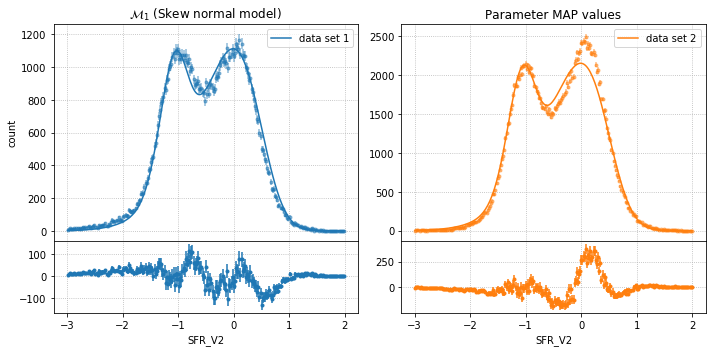

In [7]:


#for V2
print("V2")
plot_hist(data1_wall_v2,data2_void_v2,bins_,label_v2)
print("Running Model 1 using V2...")

#model 1
Model_1_fit(bounds1,data1_wall_v2,data2_void_v2,bins_,label_v2)
Model_1_sampler(prior_xform1,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ1_v2 = Model1_output(data1_wall_v2,data2_void_v2,bins_,label_v2)

print("Running Model 2 using V2...")



running minimizer...this might take a few minutes...
plotting best fit results...


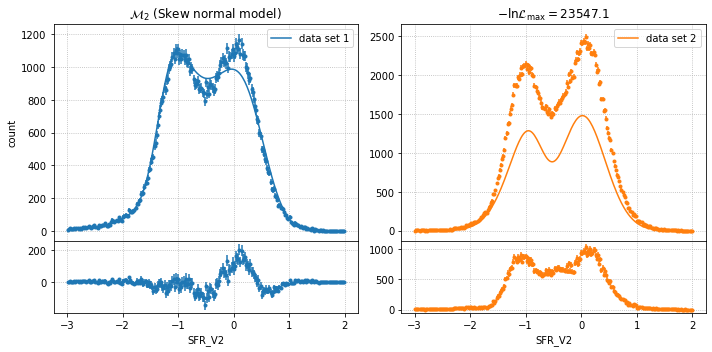

In [10]:
#model2
Model_2_fit(bounds2,data1_wall_v2,data2_void_v2,bins_,label_v2)

# #Baye's Factor
# lnB12_v2 = lnZ1_v2 - lnZ2_v2
# logB12_v2 = 0.434 * lnB12_v2

# print("Log of Baye's Factor for g-r using V2 is: ", logB12_v2)

running the nested sampler... this might take from minutes to hours...


iter: 10656 | batch: 0 | bound: 134 | nc: 313 | ncall: 241565 | eff(%):  4.402 | loglstar:   -inf < -13741.140 <    inf | logz: -13768.843 +/-  0.329 | dlogz: 5892.855 >  0.010                      /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 12003 | batch: 0 | bound: 153 | nc: 25 | ncall: 279019 | eff(%):  4.294 | loglstar:   -inf < -10579.754 <    inf | logz: -10608.825 +/-  0.338 | dlogz: 3575.200 >  0.010                       /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserW

iter: 24462 | batch: 0 | bound: 339 | nc: 25 | ncall: 688942 | eff(%):  3.548 | loglstar:   -inf < -3304.633 <    inf | logz: -3357.163 +/-  0.455 | dlogz: 306.853 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 25657 | batch: 0 | bound: 356 | nc: 25 | ncall: 735187 | eff(%):  3.487 | loglstar:   -inf < -3182.669 <    inf | logz: -3237.569 +/-  0.464 | dlogz: 185.920 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserW

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 42867 | batch: 0 | bound: 599 | nc: 25 | ncall: 1506528 | eff(%):  2.844 | loglstar:   -inf < -2796.362 <    inf | logz: -2880.389 +/-  0.569 | dlogz:  2.921 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 59246 | batch: 5 | bound: 787 | 

sampler output saved as pickle file 'sampler_results_model2_SFR_V2'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 4.00282347e+02 -9.03843260e-01  3.30086225e-01 -1.18533686e+00
  1.69984572e+03  4.13261542e-01  9.95143758e-01 -2.55294829e+00
  9.35921503e+02 -8.85887233e-01  3.46469084e-01 -1.48236602e+00
  3.12801241e+03  4.57562976e-01  8.80734009e-01 -2.42549722e+00]
Best fit results: 
Bayesian Evidence for model 2 :  -2879.8402032102526


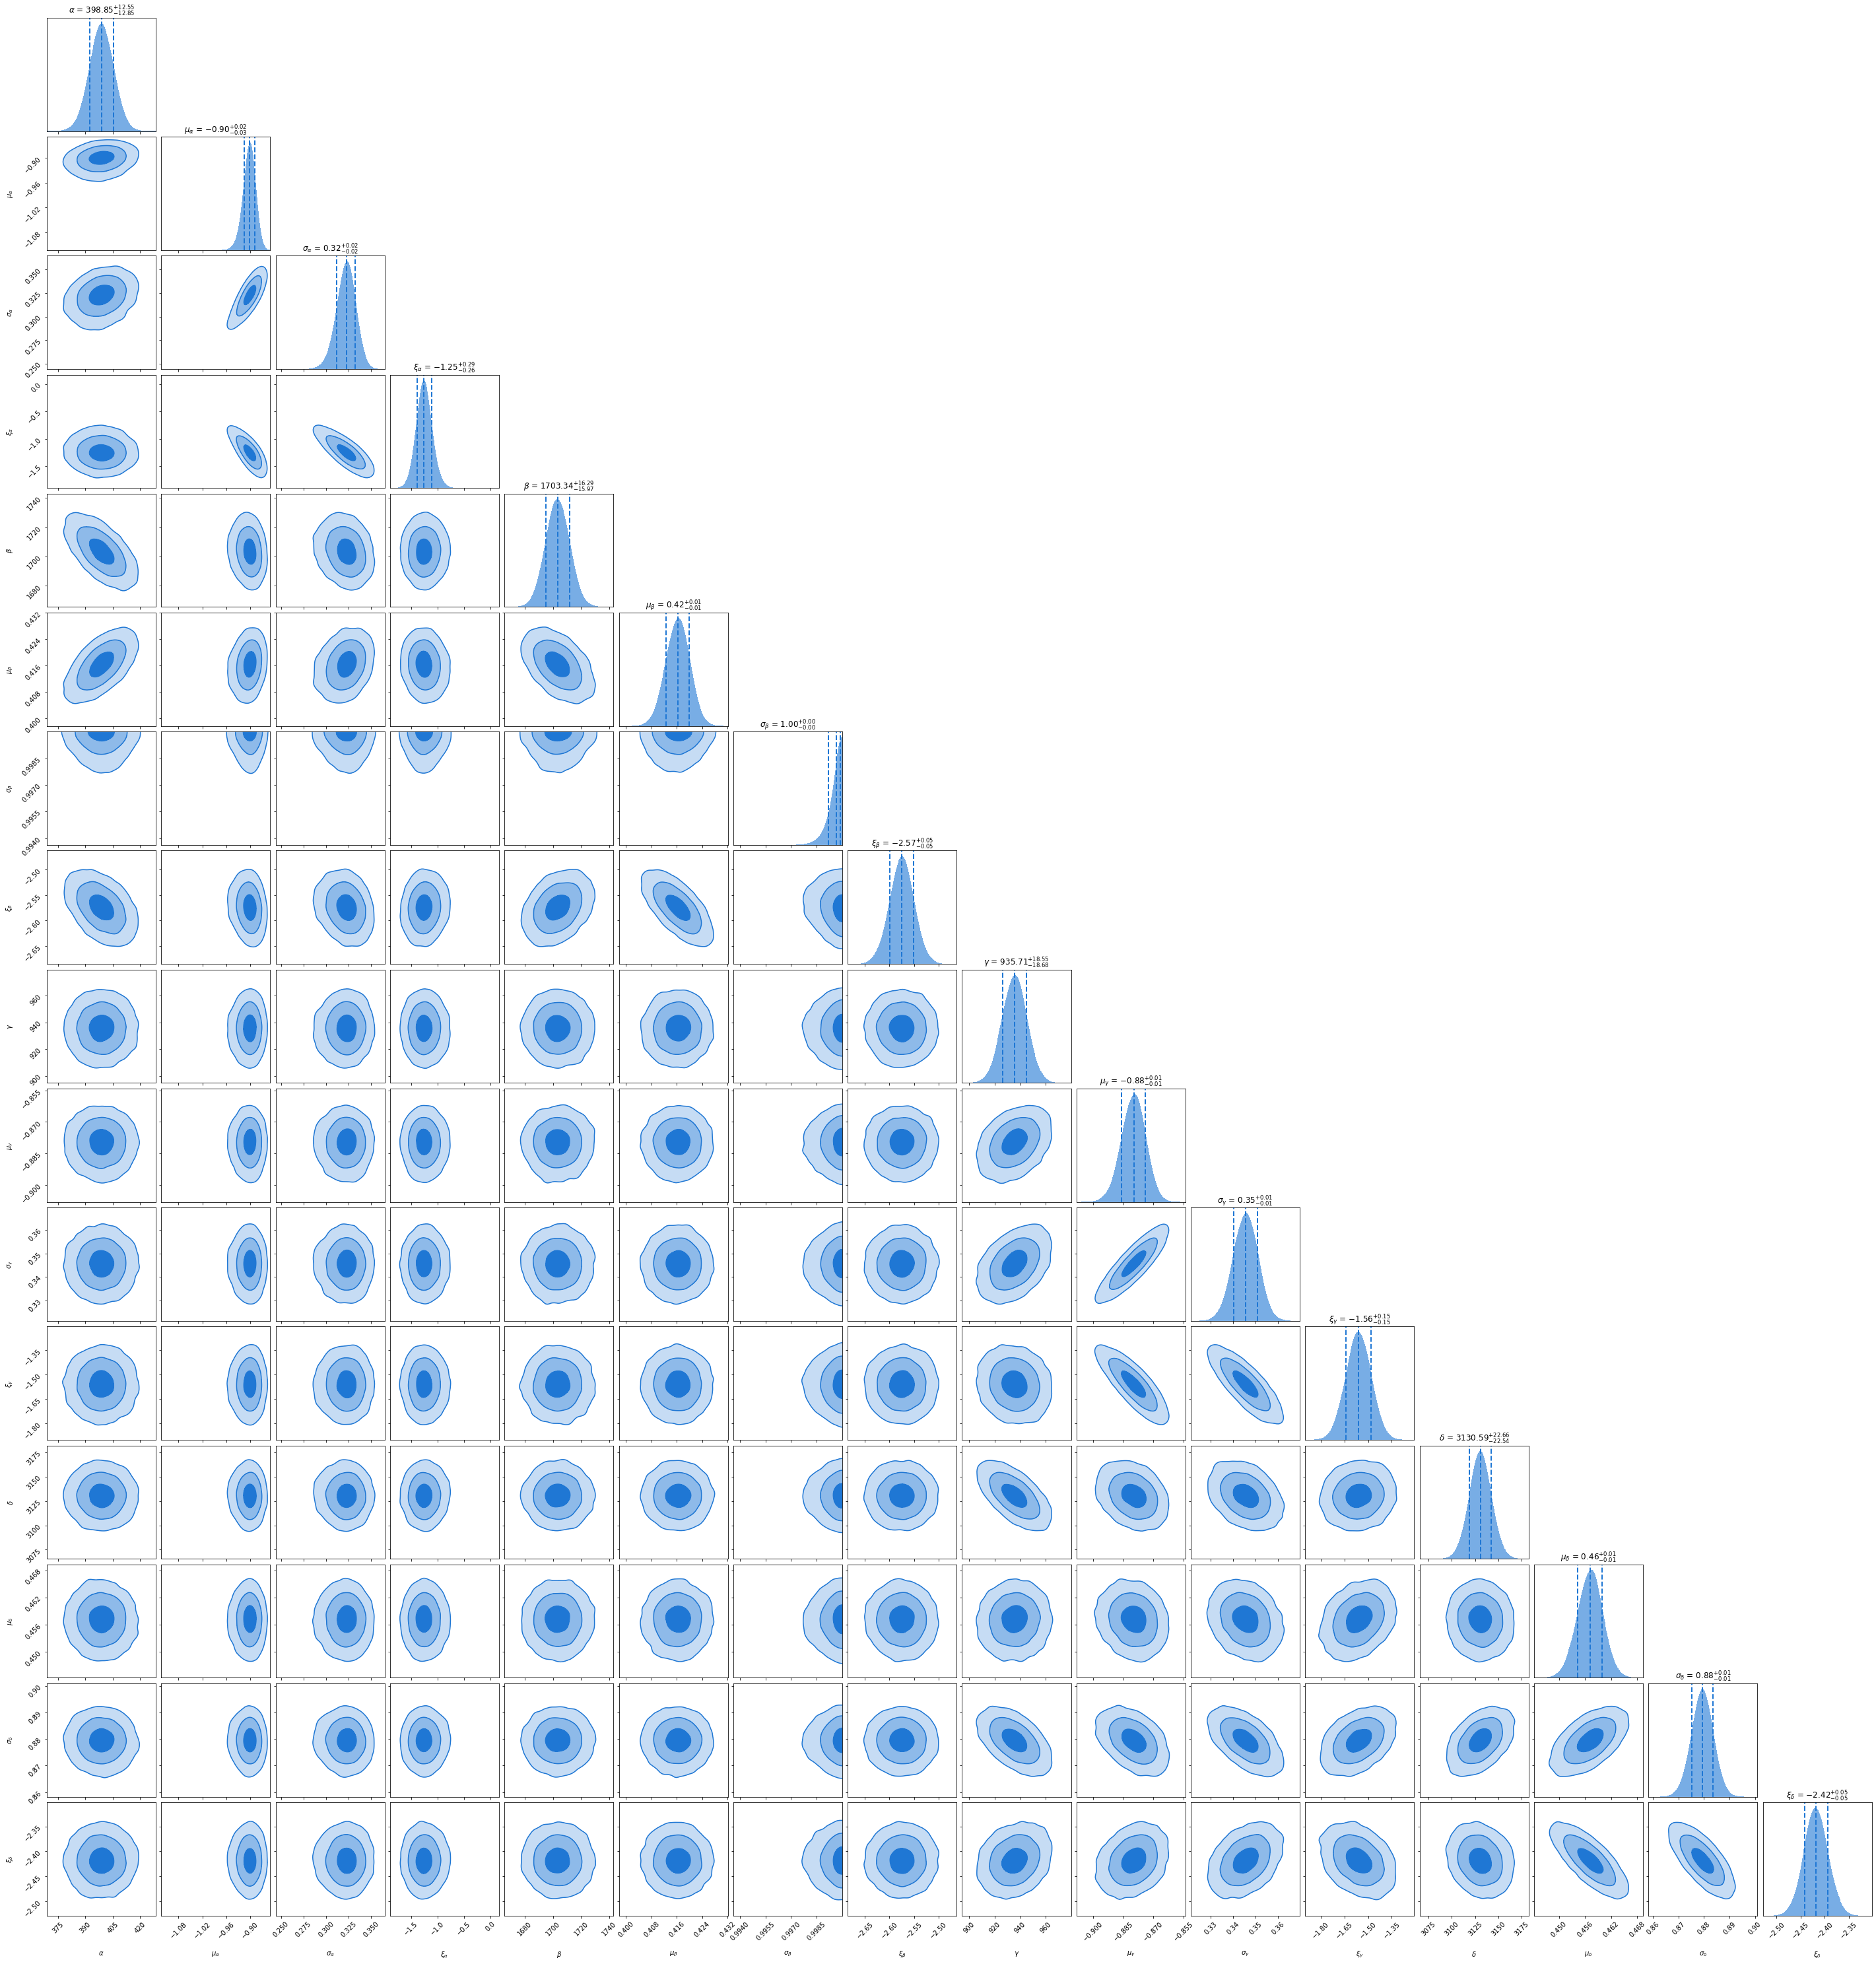

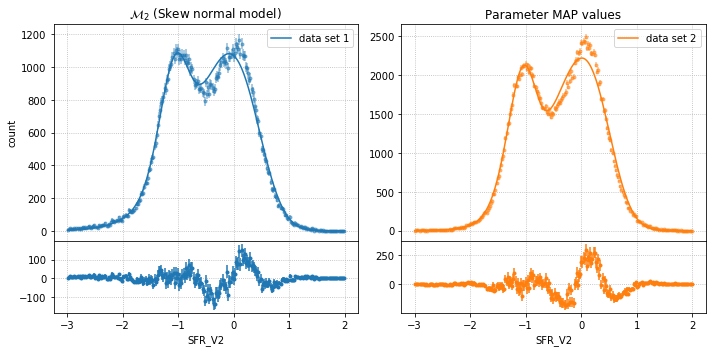

In [11]:
Model_2_sampler(prior_xform2,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ2_v2 = Model2_output(data1_wall_v2,data2_void_v2,bins_,label_v2)

